## Homework for 01_intro_AI_on_Supercomputer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

data = pd.read_csv('slimmed_realestate_data.csv')


In [2]:
 # set our initial slope and intercept
m = 5.
b = 1000.
batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1


In [3]:
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()
n= len(x)

In [4]:
sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)

In [5]:
denominator = n * sum_x2 - sum_x * sum_x

In [6]:
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print('y = %f * x + %f' % (m,b))

# saving these for later comparison
m_calc = m
b_calc = b

y = 87.688145 * x + 34754.077892


In [7]:
def model(x,m,b):
   return m * x + b

def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')

In [8]:
def run_minibatch(m, b, batch_size, learning_rate_m, learning_rate_b):
    # use these to plot our progress over time
    loss_history = []
    # convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
    # data_x = data['GrLivArea'].to_numpy()
    # data_y = data['SalePrice'].to_numpy()

    # we run our loop N times
    #loop_N = 30

    loop_N = 30*len(data['GrLivArea'])//batch_size
    for i in range(loop_N):
      # divide panda data randomly into minibatches
        data_batch = data.sample(batch_size)
        data_x = data_batch['GrLivArea'].to_numpy()
        data_y = data_batch['SalePrice'].to_numpy()

       # update our slope and intercept based on the current values
        m = updated_m(data_x,data_y,m,b,learning_rate_m)
        b = updated_b(data_x,data_y,m,b,learning_rate_b)

       # calculate the loss value
        loss_value = np.mean(loss(data_x,data_y,m,b))

       # keep a history of our loss values
        loss_history.append(loss_value)

       # print our progress
        print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))

       # close/delete previous plots
        plt.close('all')

       # create a 1 by 2 plot grid
        fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
       # lot our usual output
        plot_data(data_x,data_y,m,b,ax[0])

       # here we also plot the calculated linear fit for comparison
        line_x = np.arange(data_x.min(),data_x.max())
        line_y = line_x * m_calc + b_calc
        ax[0].plot(line_x,line_y,'b-',label='calculated')
       # add a legend to the plot and x/y labels
        ax[0].legend()
        ax[0].set_xlabel('square footage')
        ax[0].set_ylabel('sale price')

       # plot the loss 
        loss_x = np.arange(0,len(loss_history))
        loss_y = np.asarray(loss_history)
        ax[1].plot(loss_x,loss_y, 'o-')
        ax[1].set_yscale('log')
        ax[1].set_xlabel('loop step')
        ax[1].set_ylabel('loss')
        plt.show()
       # gives us time to see the plot
        time.sleep(2.5)
       # clears the plot when the next plot is ready to show.
        ipydis.clear_output(wait=True)


Please plot your learning curve for different batch size, such as 32, 64, 128, 256, 512.

**Comment**: 

With increasing batch size, we observed fewer steps for one epoch, less fluctuation in the loss values, but overall shows higher loss values. 

[515]  dy_i = 91.98 * x + 28465.60     previously calculated: y_i = 87.69 * x + 34754.08    loss: 2284292472.168416


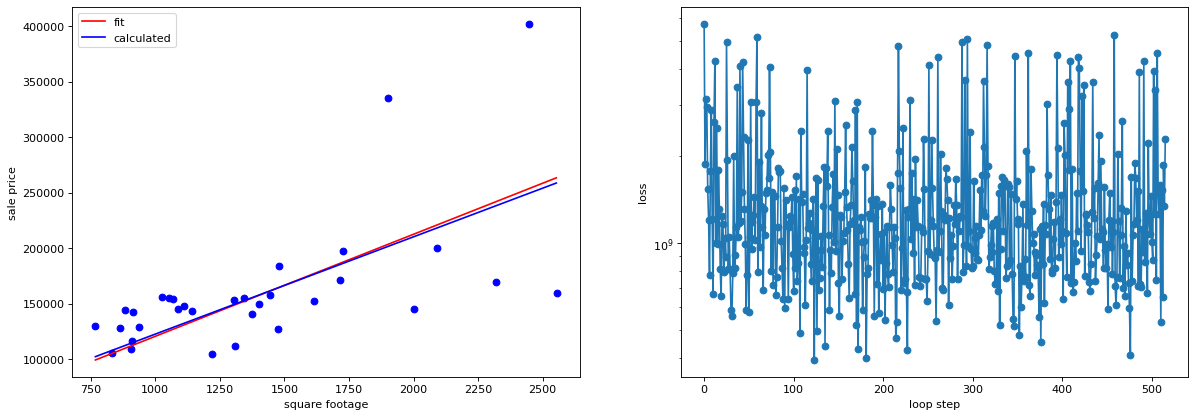

In [11]:
size=32
print("Batch size: %s" % size)
run_minibatch(m=5, b=1000, batch_size= size, learning_rate_m=1e-7, learning_rate_b=1e-1)

[257]  dy_i = 86.33 * x + 33262.93     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1085684573.094759


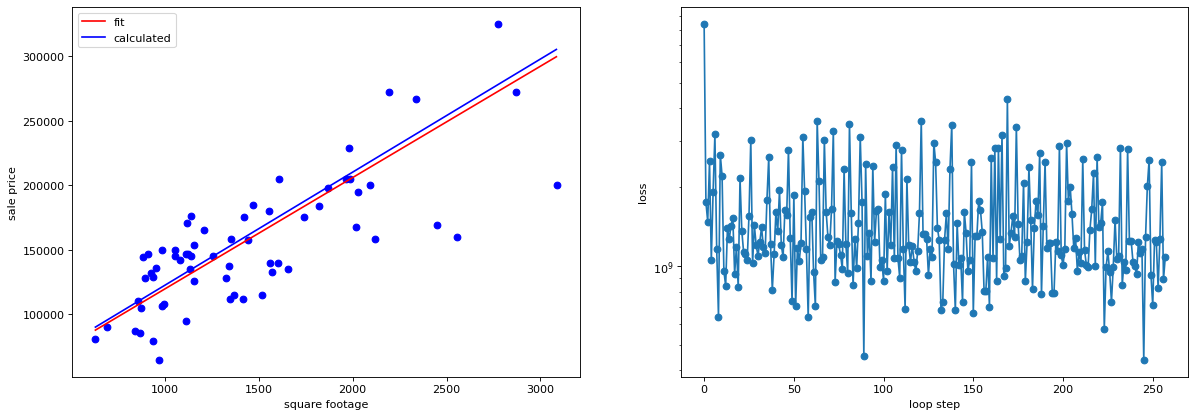

In [12]:
size=64
run_minibatch(m=5, b=1000, batch_size= size, learning_rate_m=1e-7, learning_rate_b=1e-1)

[128]  dy_i = 86.54 * x + 33008.73     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1400660500.082974


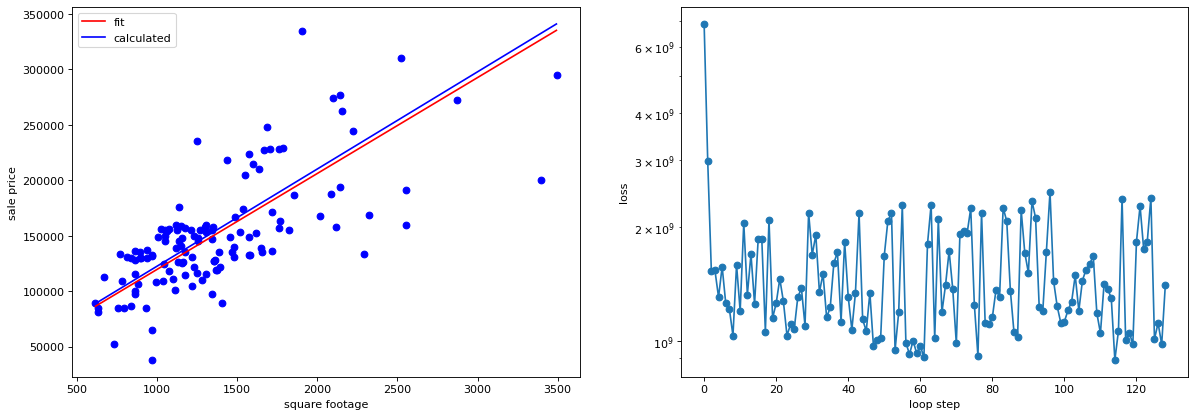

In [13]:
size=128
run_minibatch(m=5, b=1000, batch_size= size, learning_rate_m=1e-7, learning_rate_b=1e-1)

[063]  dy_i = 88.74 * x + 33758.40     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1540893256.296343


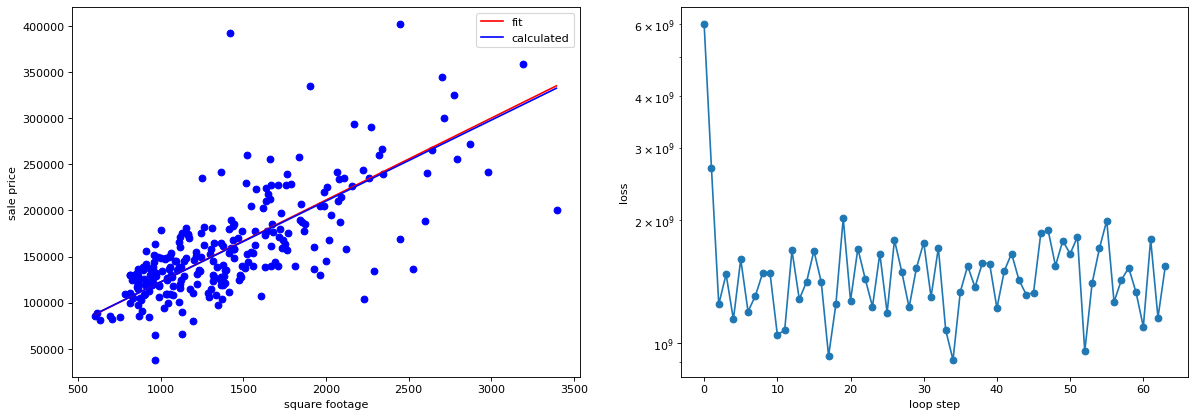

In [14]:
size=256
run_minibatch(m=5, b=1000, batch_size= size, learning_rate_m=1e-7, learning_rate_b=1e-1)

[031]  dy_i = 88.55 * x + 32985.49     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1454197539.726507


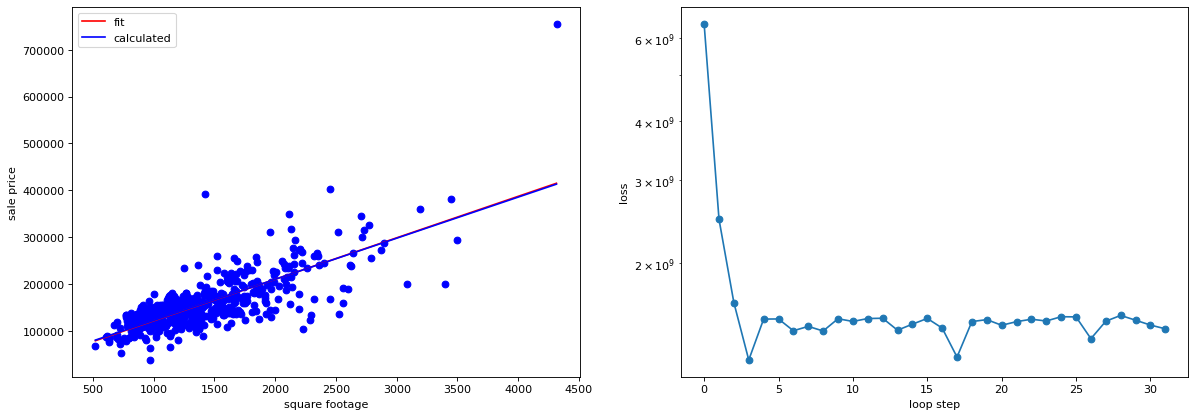

In [15]:
size=512
run_minibatch(m=5, b=1000, batch_size= size, learning_rate_m=1e-7, learning_rate_b=1e-1)

### Bonus point: Learning curves at different learning rates

**Comment**: 

With linear increase of batch size and learning rate for both parameters, we observed more fluctation in the loss values and at the increasing scale of 8 the training did not converge.

[063]  dy_i = 93.73 * x + 30695.10     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1247882925.666044


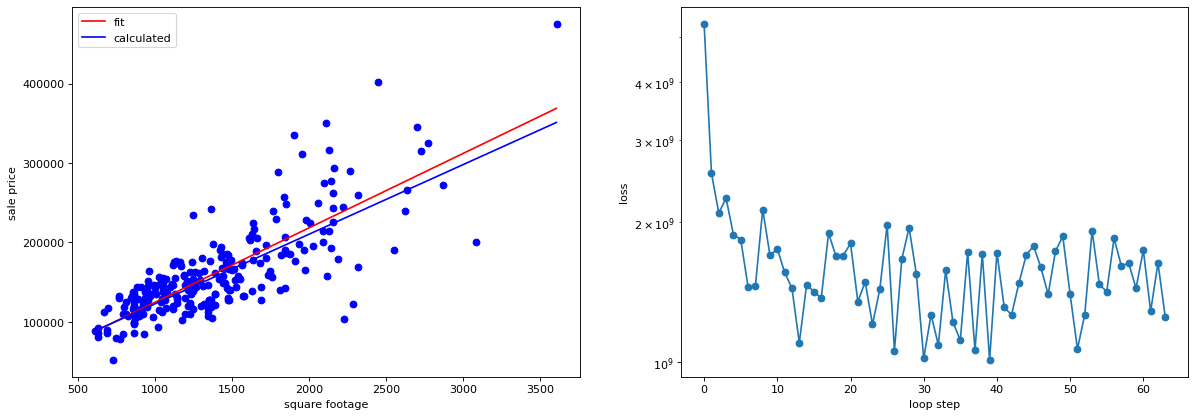

In [18]:
run_minibatch(m=5, b=1000, batch_size= 64*4, learning_rate_m=1e-7*4, learning_rate_b=1e-1*4)

[031]  dy_i = -496217.59 * x + 834079384.59     previously calculated: y_i = 87.69 * x + 34754.08    loss: 86390433263244048.000000


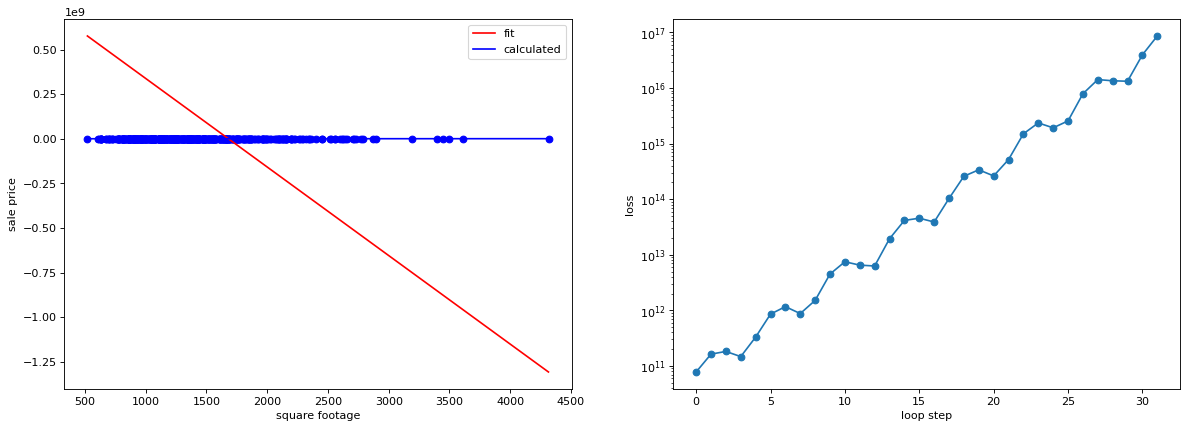

In [9]:
n_scale = 8
run_minibatch(m=5, b=1000, batch_size= 64*n_scale, learning_rate_m=1e-7*n_scale, learning_rate_b=1e-1*n_scale)